# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [233]:
# Importing Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

In [2]:
# Read the EdTech industry dataset file
data = pd.read_csv("ExtraaLearn.csv")

In [4]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observations:
- We can use dtypes or info function to get the data types of each column in the table.
- The info function will provide not just the data type but also the count of each column, and the number of not null items and column names associated  with it.
- From the output we can also observe that there are no null values, So we do not need to fix any dataset. 

In [6]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

 Observations:
- The nunique function provides us with the number of unique items in each column.
- We can see that 'ID' is the primary key and we can remove it as it won't be helpful in our model building. 

In [253]:
#Removing the unique parameter ID
df=data.drop(['ID'],axis=1)

In [21]:
#Validating for any missing data points
pd.DataFrame(data={'% of Missing Values': (df.isna().sum())}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0
print_media_type2,0


In [254]:
#Rechecking the table structure after fixing any null and removing primary keys like ID's
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [17]:
# Creating numerical columns
num_cols=['age', 'time_spent_on_website', 'website_visits', 'page_views_per_visit']

In [11]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


In [95]:
# Creating categorical variables 
cat_cols= ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media',
          'educational_channels', 'referral']

for column in cat_cols:
    print(df[column].value_counts())
    print('-'*50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

Observations:
After exporing the numerical and categorical columns 
- We can see there are 4 numarical column and its min, max and mean datapoints. 
- There are 9 categorical columns out of which 'Status' is the dependant variable.
- We are also not seeing any wrong data category inputs.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

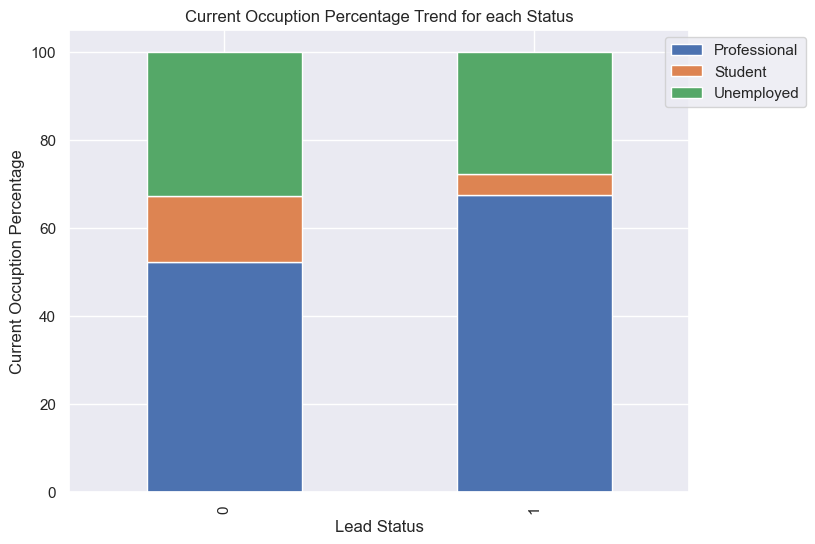

In [52]:
#1 Current Occupation vs the Lead Status Stacked Bar Graph
(pd.crosstab(df['status'],df['current_occupation'],normalize='index')*100).plot(kind='bar',figsize=(8,6),stacked=True)
plt.title('Current Occuption Percentage Trend for each Status')
plt.xlabel('Lead Status')
plt.ylabel('Current Occuption Percentage')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))


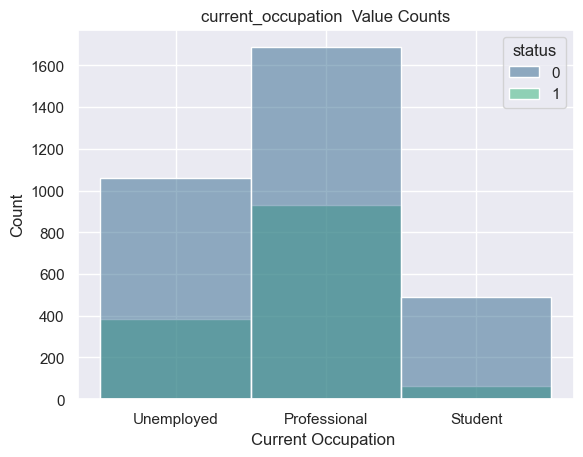

In [257]:
#Current Occupation vs the Lead Status Stacked Bar Graph
sns.histplot(data = df, x= 'current_occupation', hue = 'status', palette='viridis')
plt.title('current_occupation  Value Counts')
plt.xlabel('Current Occupation ')
plt.ylabel('Count')
plt.show()

1. Observations:
- From the above stacked bar and percentage graph we can see that the Professionals have higher Convertion percentage compared to Unemployed or students.
- About 70% of Converted paid customers are Professionals.

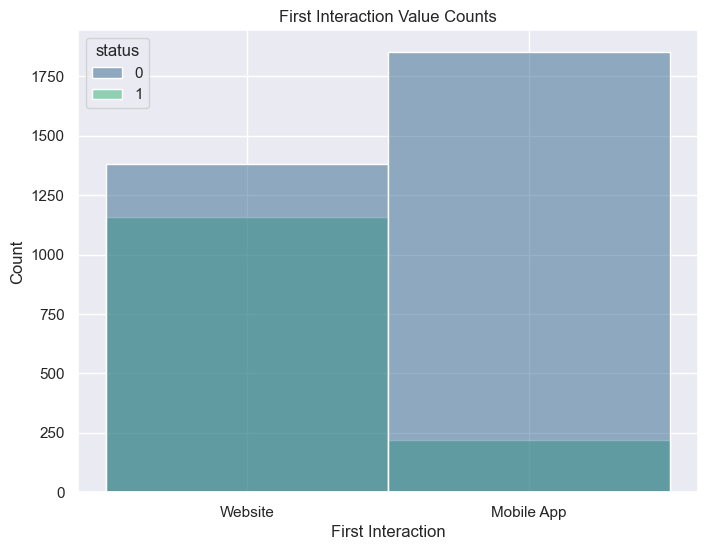

In [83]:
#2 First impression and impact
plt.figure(figsize=(8,6))
sns.histplot(data = df, x= 'first_interaction', hue = 'status', palette='viridis')
plt.title('First Interaction Value Counts')
plt.xlabel('First Interaction')
plt.ylabel('Count')
plt.show()

2. Observations:
- The Website Customers have better impression than Mobile app customers based on the conversion rate. 

<Figure size 800x600 with 0 Axes>

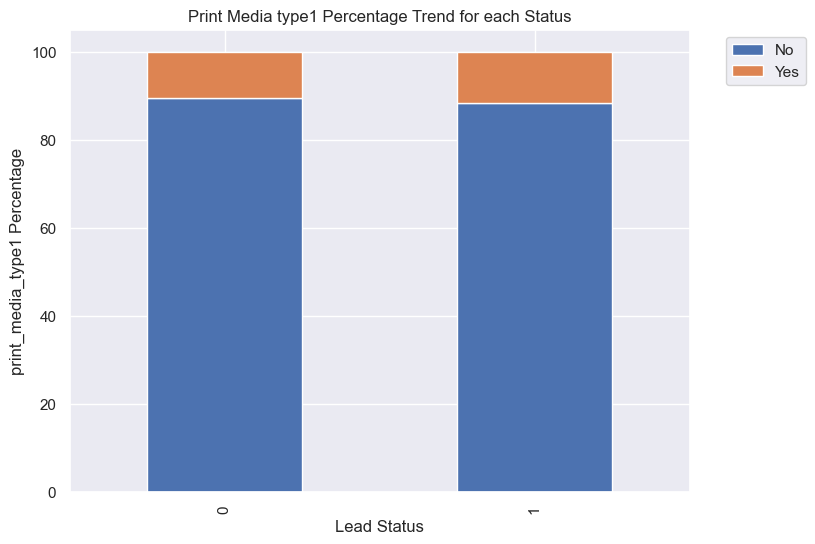

In [109]:
#3 To Identify Best way of interaction
# print_media_type1 Percentage vs status
plt.figure(figsize=(8,6))
#sns.histplot(data = df, x= 'print_media_type1', hue = 'status', palette='viridis')
(pd.crosstab(df['status'],df['print_media_type1'],normalize='index')*100).plot(kind='bar',figsize=(8,6),stacked=True)
plt.title('Print Media type1 Percentage Trend for each Status')
plt.xlabel('Lead Status')
plt.ylabel('print_media_type1 Percentage')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

<Figure size 800x600 with 0 Axes>

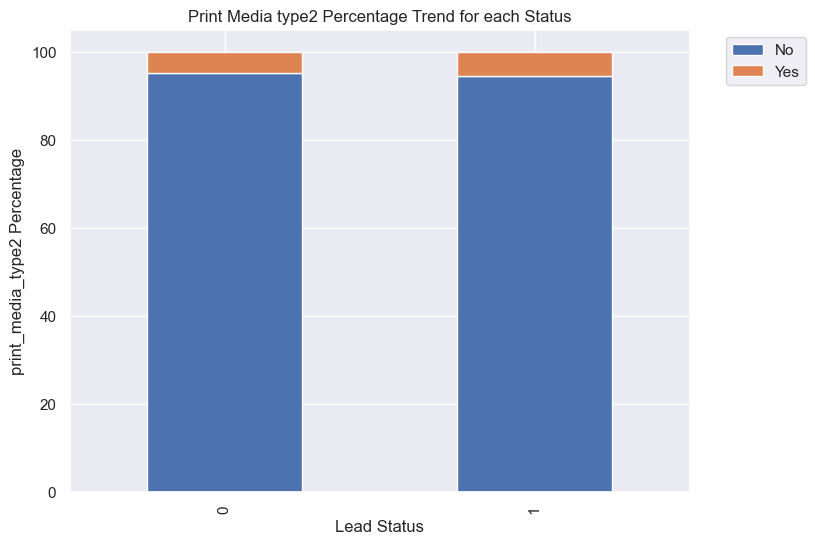

In [110]:
# print_media_type2 Percentage vs status
plt.figure(figsize=(8,6))
#sns.histplot(data = df, x= 'print_media_type2', hue = 'status', palette='viridis')
(pd.crosstab(df['status'],df['print_media_type2'],normalize='index')*100).plot(kind='bar',figsize=(8,6),stacked=True)
plt.title('Print Media type2 Percentage Trend for each Status')
plt.xlabel('Lead Status')
plt.ylabel('print_media_type2 Percentage')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

<Figure size 800x600 with 0 Axes>

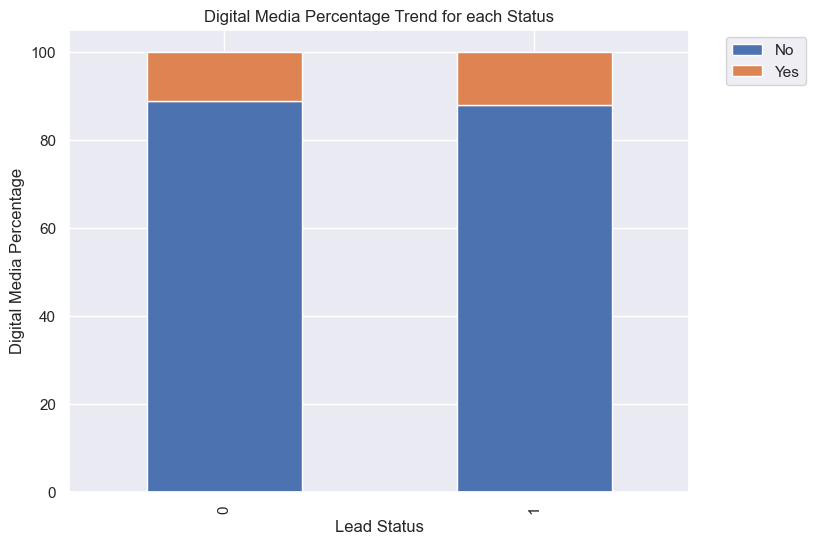

In [111]:
# Digital Media Percentage vs status
plt.figure(figsize=(8,6))
#sns.histplot(data = df, x= 'digital_media', hue = 'status', palette='viridis')
(pd.crosstab(df['status'],df['digital_media'],normalize='index')*100).plot(kind='bar',figsize=(8,6),stacked=True)
plt.title('Digital Media Percentage Trend for each Status')
plt.xlabel('Lead Status')
plt.ylabel('Digital Media Percentage')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

<Figure size 800x600 with 0 Axes>

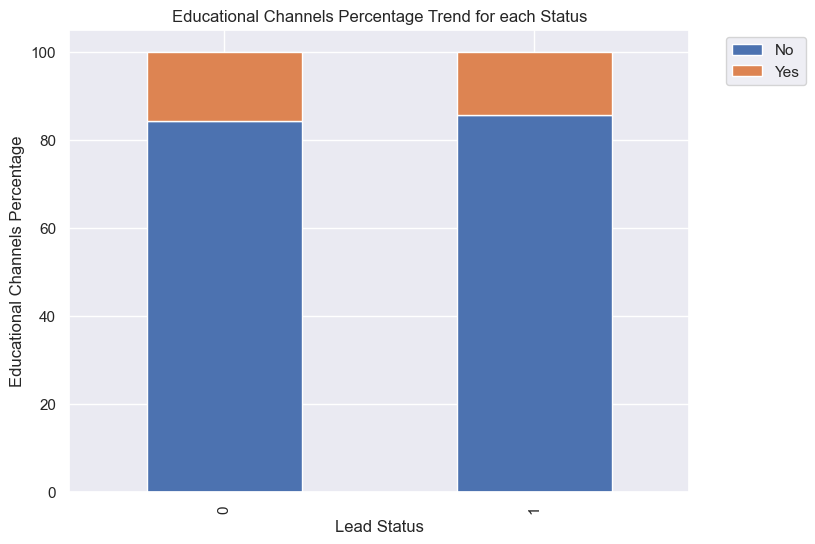

In [112]:
# Educational Channels Percentage vs status
plt.figure(figsize=(8,6))
#sns.histplot(data = df, x= 'digital_media', hue = 'status', palette='viridis')
(pd.crosstab(df['status'],df['educational_channels'],normalize='index')*100).plot(kind='bar',figsize=(8,6),stacked=True)
plt.title('Educational Channels Percentage Trend for each Status')
plt.xlabel('Lead Status')
plt.ylabel('Educational Channels Percentage')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

Text(0.5, 1.0, 'Print Media type 1 Trend for each Status')

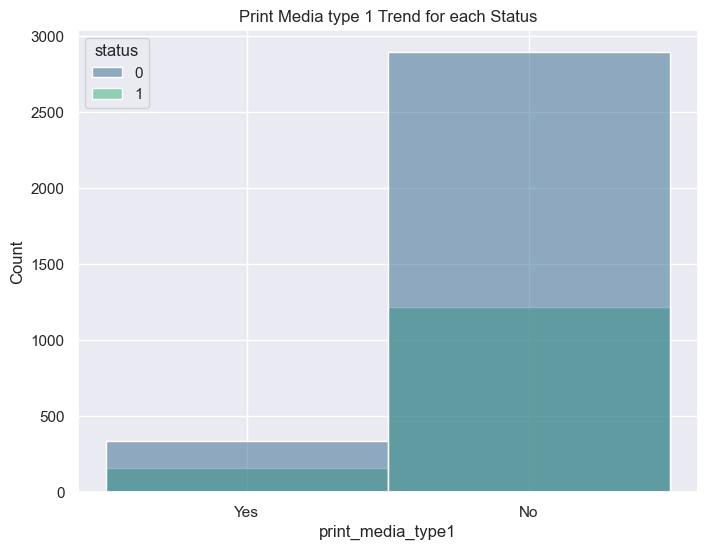

In [277]:
#4 To Identify the highest number of conversion based on interactions 
#Print Media type 1 Trend for each Status
plt.figure(figsize=(8,6))
sns.histplot(data = df, x= 'print_media_type1', hue = 'status', palette='viridis')
plt.title('Print Media type 1 Trend for each Status')

Text(0.5, 1.0, 'Print Media type 2 Trend for each Status')

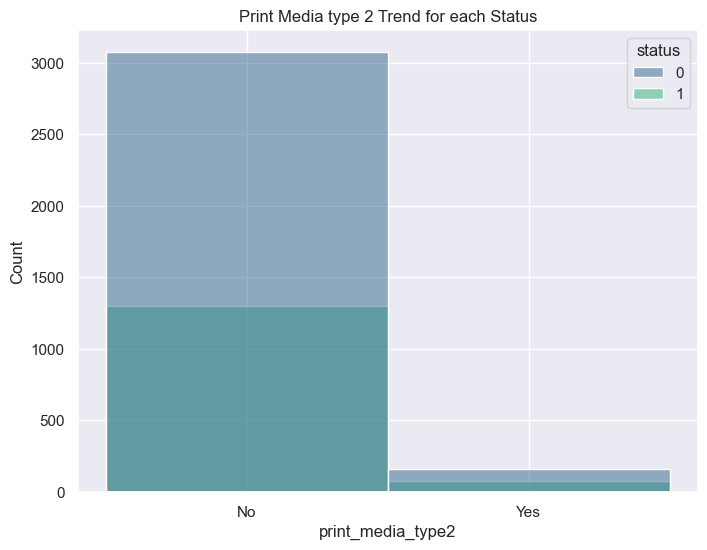

In [113]:
#Print Media type 2 Trend for each Status
plt.figure(figsize=(8,6))
sns.histplot(data = df, x= 'print_media_type2', hue = 'status', palette='viridis')
plt.title('Print Media type 2 Trend for each Status')

Text(0.5, 1.0, 'Digital Media Trend for each Status')

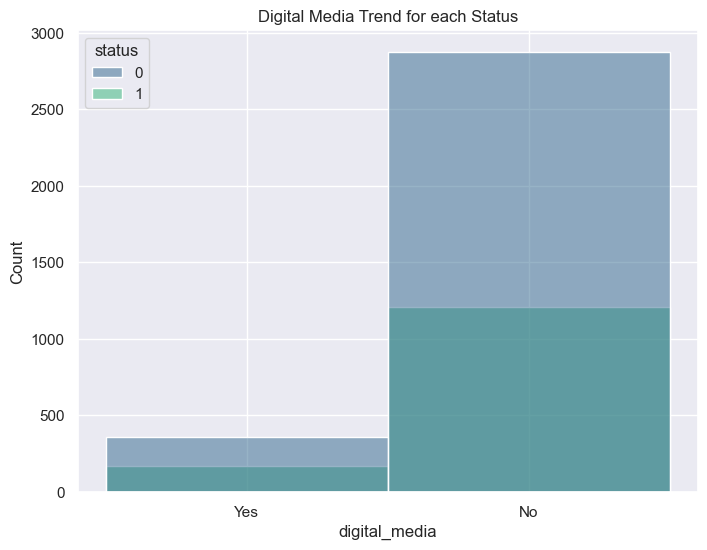

In [118]:
#4 Highest conversion Rate
# Digital Media Trend for each Status
plt.figure(figsize=(8,6))
sns.histplot(data = df, x= 'digital_media', hue = 'status', palette='viridis')
plt.title('Digital Media Trend for each Status')



Text(0.5, 1.0, 'Educational Channels Trend for each Status')

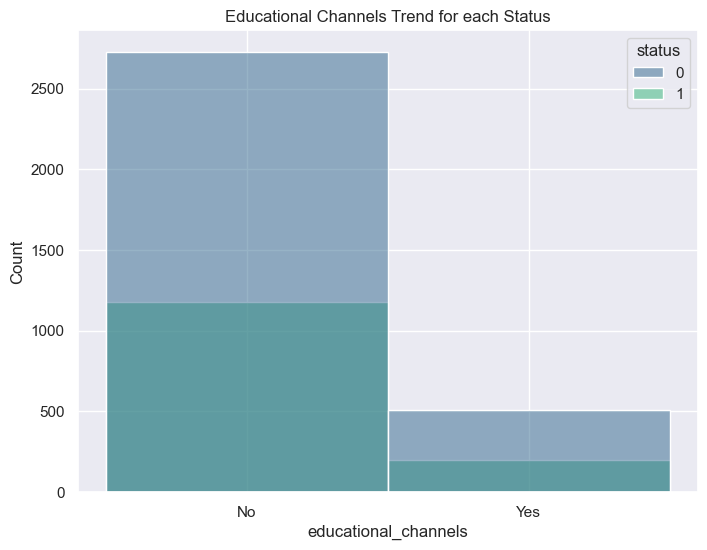

In [276]:
#4 Highest conversion Rate
# Educational Channels Trend for each Status
plt.figure(figsize=(8,6))
sns.histplot(data = df, x= 'educational_channels', hue = 'status', palette='viridis')
plt.title('Educational Channels Trend for each Status')

3. Observations:
   - From the above bar graphs we can observe that the educational channels interation have move influence on the conversion rate.
4. Observations:
   - We can see that Print media 2 and digital media have better conversion rate.
   

Text(0.5, 1.0, 'Activity Trend for each Status')

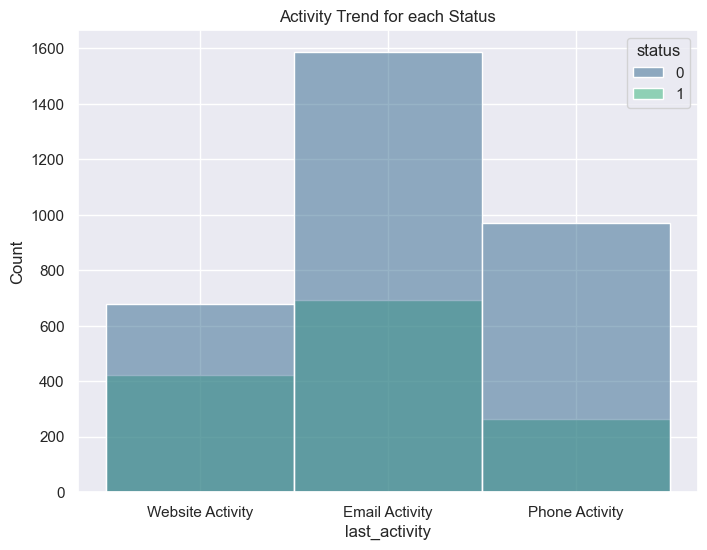

In [116]:
#5 To Identify the highest number of conversion based on Application activity 
plt.figure(figsize=(8,6))
sns.histplot(data = df, x= 'last_activity', hue = 'status', palette='viridis')
plt.title('Activity Trend for each Status')

Text(0.5, 1.0, 'Profile_completed Trend for each Status')

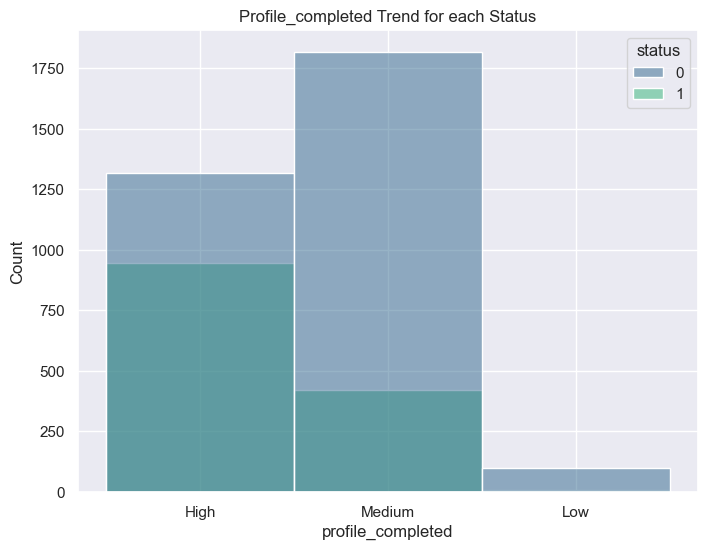

In [268]:
#5 To Identify the highest number of conversion based on Profile_completed  
plt.figure(figsize=(8,6))
sns.histplot(data = df, x= 'profile_completed', hue = 'status', palette='viridis')
plt.title('Profile_completed Trend for each Status')

5. Observations:
   From the website and activity data we can interpret that
- Website Activity has better conversion rate based on the profile creation information.
- Phone activity has much lower conversion rate based on the above graph.
- Also the user completing the website creation has more chances of conversion

Text(0.5, 1.0, 'Age Trend for each Status')

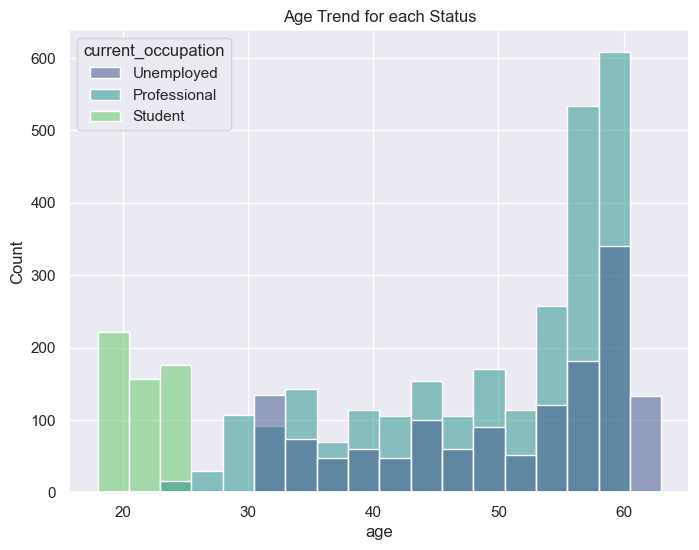

In [274]:
# To Identify the highest number of conversion based on Age  
plt.figure(figsize=(8,6))
sns.histplot(data = df, x= 'age', hue = 'current_occupation', palette='viridis')
plt.title('Age Trend for each Status')

Text(0.5, 1.0, 'Age Trend for each Status')

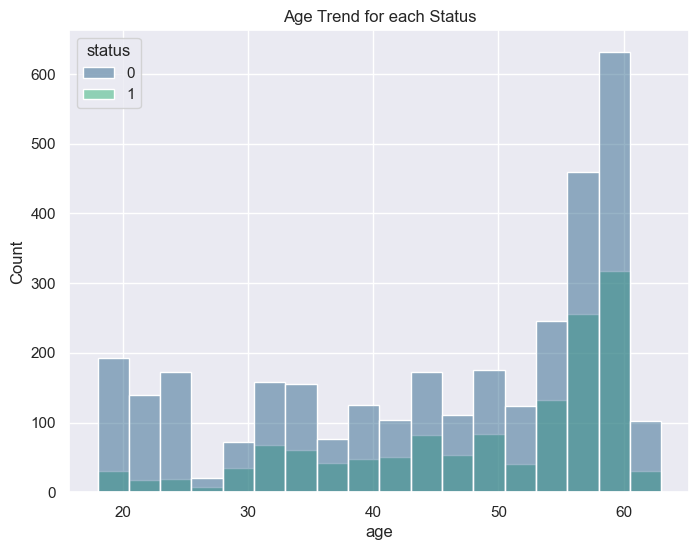

In [275]:
# To Identify the highest number of conversion based on Age  
plt.figure(figsize=(8,6))
sns.histplot(data = df, x= 'age', hue = 'status', palette='viridis')
plt.title('Age Trend for each Status')

Text(0.5, 1.0, 'referral Trend for each Status')

<Figure size 800x600 with 0 Axes>

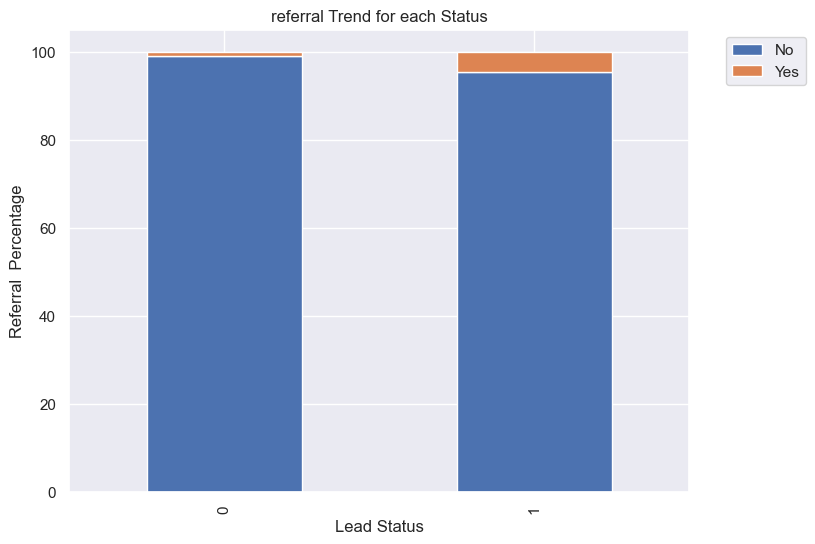

In [143]:
# To Identify the highest number of conversion based on referral  
plt.figure(figsize=(8,6))
(pd.crosstab(df['status'],df['referral'],normalize='index')*100).plot(kind='bar',figsize=(8,6),stacked=True)
plt.xlabel('Lead Status')
plt.ylabel('Referral  Percentage')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('referral Trend for each Status')

Observations:
- Referrals have slight impact on the conversion rate.
- Also from the age graph we can infer that people between the age 35 to 55  and who are working profession have better conversion rate.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [163]:
# Identify any missing values
df.isna().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

Observation:
- We do not have any missing data and does not require any treatment

Text(0.5, 1.0, 'boxplot for numerical data age')

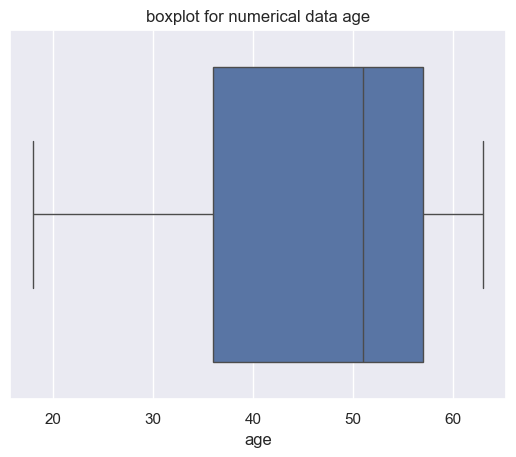

In [126]:
# Checking for outliers for numerical data age
sns.boxplot(data = df, x= 'age')
plt.title('boxplot for numerical data age')

Text(0.5, 1.0, 'boxplot for numerical data time_spent_on_website')

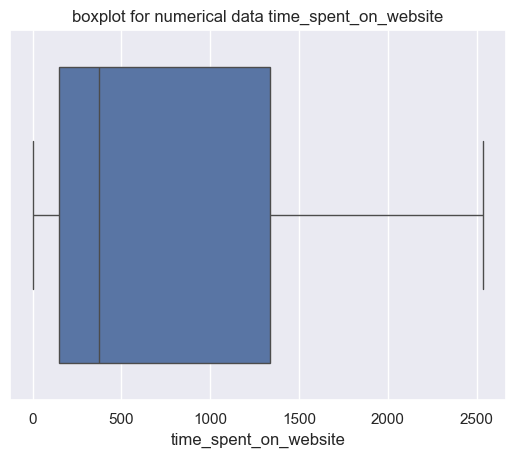

In [259]:
# Checking for outliers for numerical data time_spent_on_website
sns.boxplot(data = df, x= 'time_spent_on_website')
plt.title('boxplot for numerical data time_spent_on_website')

Text(0.5, 1.0, 'boxplot for numerical data website_visits')

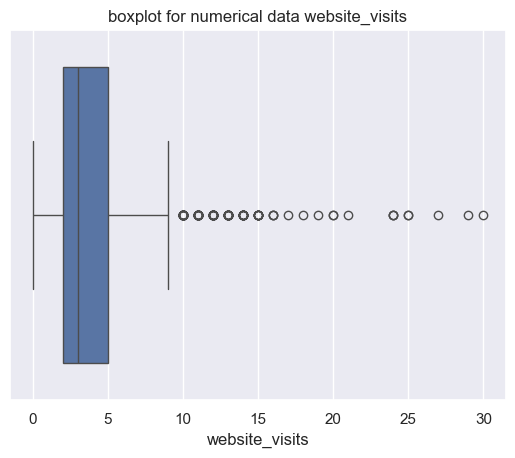

In [278]:
# Checking for outliers for numerical data website_visits
sns.boxplot(data = df, x= 'website_visits')
plt.title('boxplot for numerical data website_visits')

Text(0.5, 1.0, 'Histplot for numerical data website_visits')

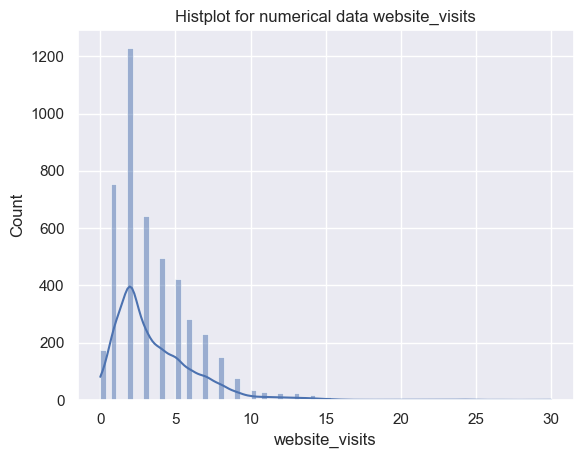

In [133]:
# To understand the outliers better for website visits 
sns.histplot(data=df, x='website_visits', kde=True)
plt.title('Histplot for numerical data website_visits')

In [136]:
df.website_visits.value_counts(normalize=True)

website_visits
2     0.266479
1     0.163703
3     0.138985
4     0.107112
5     0.091500
6     0.061145
7     0.050304
0     0.037728
8     0.032741
9     0.016912
10    0.007372
11    0.006288
12    0.005421
13    0.004987
14    0.003686
15    0.001951
24    0.000650
16    0.000650
25    0.000434
20    0.000434
30    0.000217
18    0.000217
27    0.000217
21    0.000217
17    0.000217
19    0.000217
29    0.000217
Name: proportion, dtype: float64

Text(0.5, 1.0, 'boxplot for numerical data page_views_per_visit')

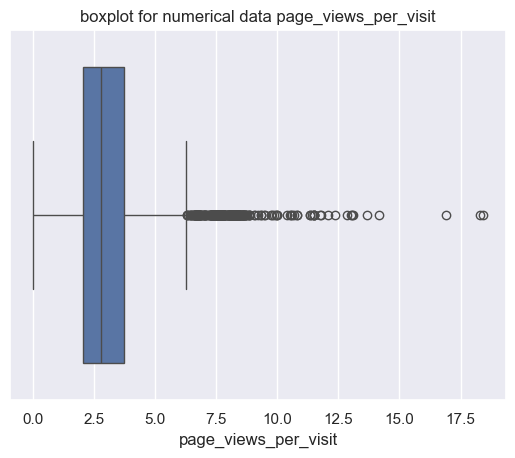

In [128]:
# Checking for outliers for numerical data page_views_per_visit
sns.boxplot(data = df, x= 'page_views_per_visit')
plt.title('boxplot for numerical data page_views_per_visit')

Text(0.5, 1.0, 'Histplot for numerical data pages views per visit')

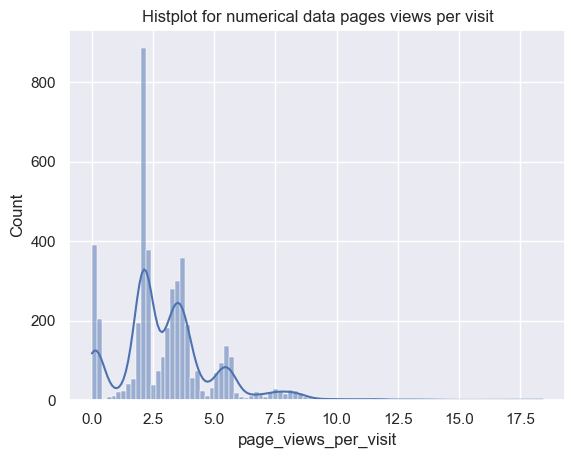

In [134]:
# To understand the outliers better for pages views per visit
sns.histplot(data=df, x='pages_views_per_visit', kde=True)
plt.title('Histplot for numerical data pages views per visit')

In [135]:
df.page_views_per_visit.value_counts(normalize=True)

page_views_per_visit
0.000    0.039245
2.168    0.003036
2.154    0.002819
2.200    0.002602
2.170    0.002385
           ...   
5.793    0.000217
4.944    0.000217
5.624    0.000217
1.413    0.000217
2.692    0.000217
Name: proportion, Length: 2414, dtype: float64

In [281]:
# We are addressing the outliers in page_views_per_visit and website_visits
df.drop(index=df[df.website_visits>9].index,inplace=True)
df.drop(index=df[df.page_views_per_visit > 5.5].index,inplace=True)

Observations:
- In the Exploratory data validation we can see that the boxplot for 'pages views per visits' and website activities' have lot of outliers.
- For website_activities should drop values greater than 9 to avoid outliers data.
- For page_views_per_visit should drop values greater than 5.5 to avoid outliers data.  

## Multivarient Analysis


Text(0.5, 1.0, 'Multivarient Analysis for numerical Variables')

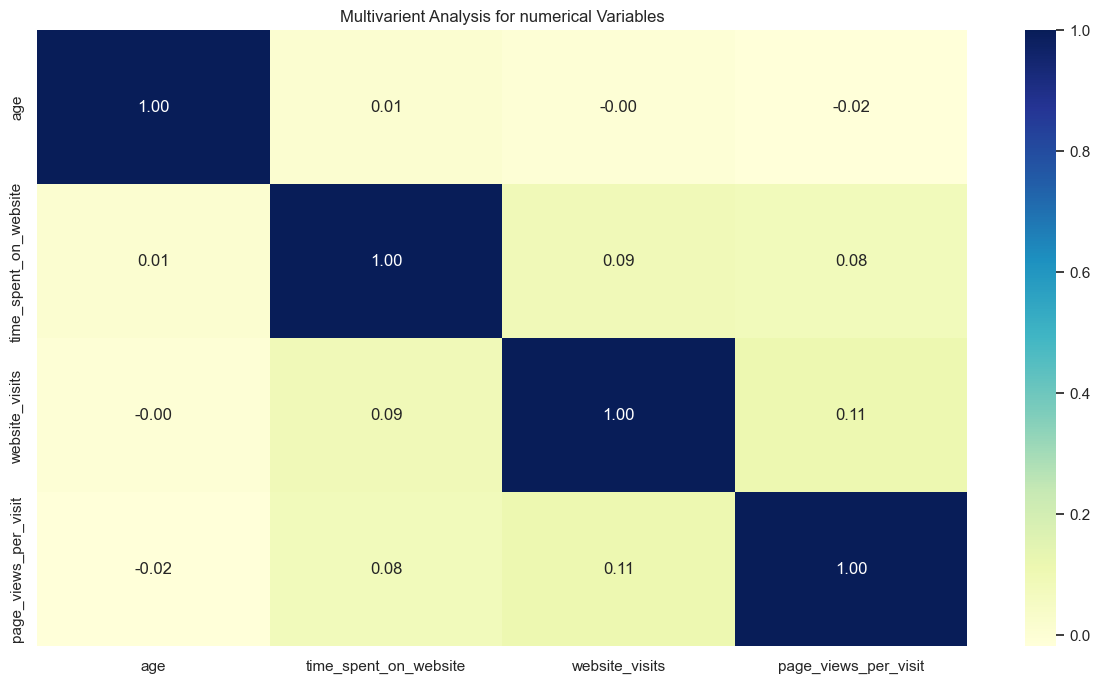

In [285]:
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')
plt.title('Multivarient Analysis for numerical Variables')

Observations:
- From the above Multivarient graph we can observe that pages_views_per_visit, time_spent and website_visits are postively correlated with each other.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [284]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4001.0,46.333667,13.085618,18.0,36.000,51.000,57.000,63.0
time_spent_on_website,4001.0,718.745814,743.698506,0.0,141.000,376.000,1313.000,2537.0
website_visits,4001.0,3.211197,2.159429,0.0,2.000,3.000,5.000,9.0
page_views_per_visit,4001.0,2.562605,1.363109,0.0,2.046,2.249,3.557,5.5


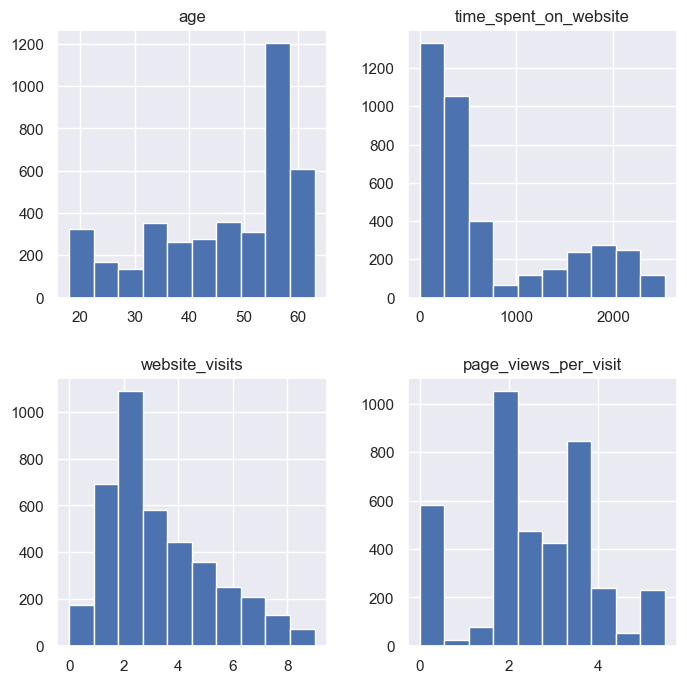

In [215]:
# Creating histograms
df[num_cols].hist(figsize=(8,8))
plt.show()

Text(0.5, 1.0, 'Box plot for page_views_per_visit after removing outliers')

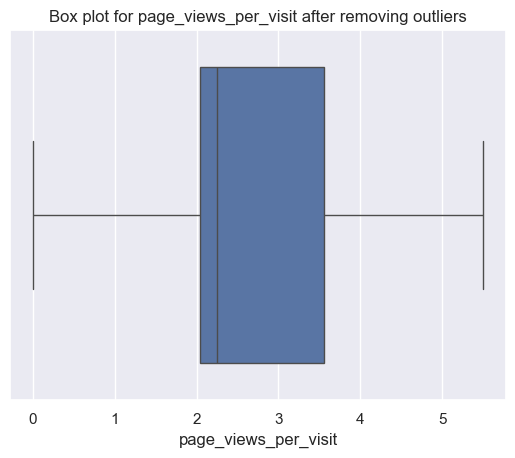

In [282]:
#Box plot for page_views_per_visit after removing outliers
sns.boxplot(data = df, x= 'page_views_per_visit')
df.page_views_per_visit.value_counts(normalize=True)
plt.title('Box plot for page_views_per_visit after removing outliers')

Text(0.5, 1.0, 'Box plot for website visits after removing outliers')

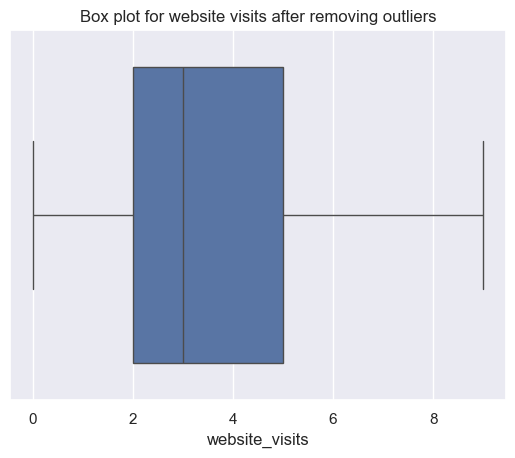

In [283]:
#Box plot for website visits after removing outliers
sns.boxplot(data = df, x= 'website_visits')
df.website_visits.value_counts(normalize=True)
plt.title('Box plot for website visits after removing outliers')

Observations:
- We have addressed all the outliers and missing values in the Customer lead status
- We do not see much changes in the mean value for website_activity and page_views_per_visits.
- But we see changes in the max values after removing the outliers.
- From the above graph we can also see the trend for the numerical columns.

## Building the Model

In [185]:
# Separating target dependent variables and independent variables for training and Testing
X=df.drop(columns='status')
Y=df['status']

In [186]:
# Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [187]:
#converting data types of columns to float
for column in ['age', 'time_spent_on_website', 'website_visits', 'page_views_per_visit']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [188]:
#List of columns to create a dummy variables
col_dummy=['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media',
          'educational_channels', 'referral']

In [189]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

In [190]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2800 entries, 1937 to 4229
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             2800 non-null   float64
 1   website_visits                  2800 non-null   float64
 2   time_spent_on_website           2800 non-null   float64
 3   page_views_per_visit            2800 non-null   float64
 4   current_occupation_Student      2800 non-null   bool   
 5   current_occupation_Unemployed   2800 non-null   bool   
 6   first_interaction_Website       2800 non-null   bool   
 7   profile_completed_Low           2800 non-null   bool   
 8   profile_completed_Medium        2800 non-null   bool   
 9   last_activity_Phone Activity    2800 non-null   bool   
 10  last_activity_Website Activity  2800 non-null   bool   
 11  print_media_type1_Yes           2800 non-null   bool   
 12  print_media_type2_Yes           2800

In [191]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Observations:
- We have built data model by splitting the data into train and test data.
- Metric score to preditct the precision, recall and F1 score.

## Building a Decision Tree model

In [192]:
# Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1957
           1       1.00      1.00      1.00       843

    accuracy                           1.00      2800
   macro avg       1.00      1.00      1.00      2800
weighted avg       1.00      1.00      1.00      2800



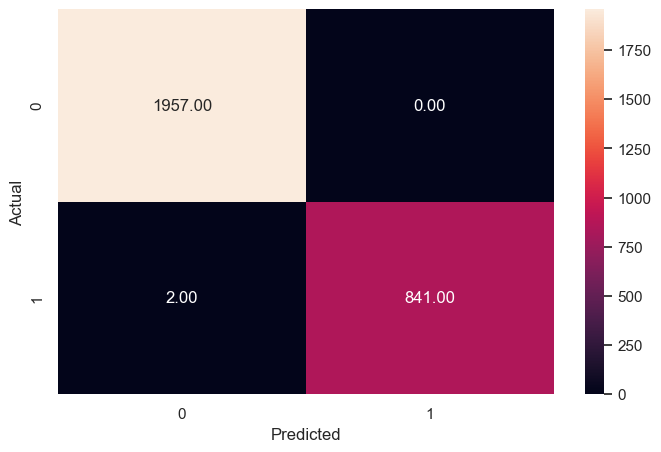

In [193]:
 # Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       839
           1       0.67      0.67      0.67       362

    accuracy                           0.80      1201
   macro avg       0.76      0.76      0.76      1201
weighted avg       0.80      0.80      0.80      1201



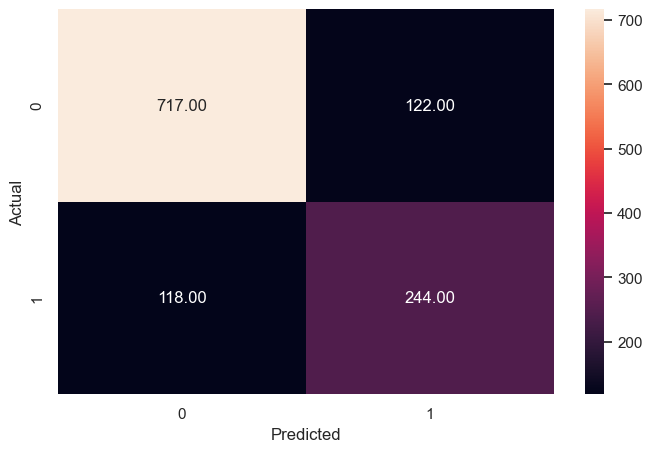

In [194]:
#Testing the trained Decision Tree
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

Observations:
- From the above decision tree we can see that the data model is overfitted as the train data has 1.00 precision and recall value, and 
- After testing the test data on the trained data model we see more difference with the accuracy of the model. Thus we can say our model is over fitted and does not provide us with the accurate results.
- We need to tune the data model to reduce the over fitting.

## Do we need to prune the tree?

In [224]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,25),
    "max_leaf_nodes": [50, 75, 100, 200],
    "min_samples_split": [5, 10, 20, 30],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=26, max_leaf_nodes=50, min_samples_split=20,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1957
           1       0.87      0.79      0.82       843

    accuracy                           0.90      2800
   macro avg       0.89      0.87      0.88      2800
weighted avg       0.90      0.90      0.90      2800



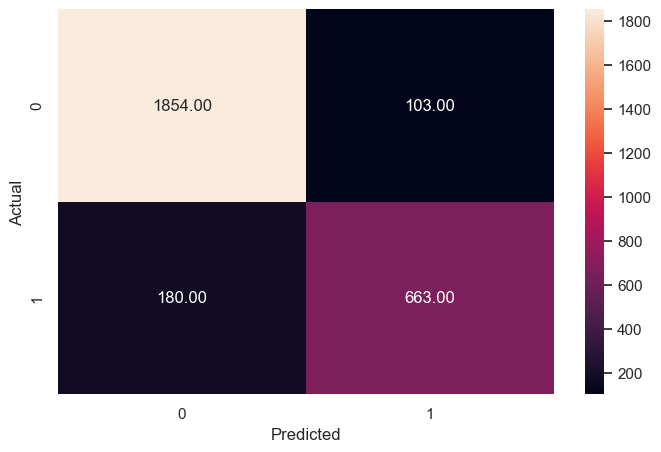

In [225]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       839
           1       0.79      0.71      0.75       362

    accuracy                           0.86      1201
   macro avg       0.83      0.82      0.82      1201
weighted avg       0.85      0.86      0.85      1201



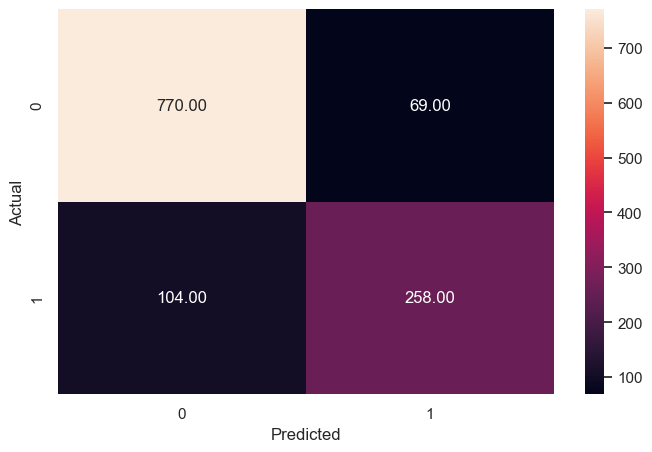

In [226]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

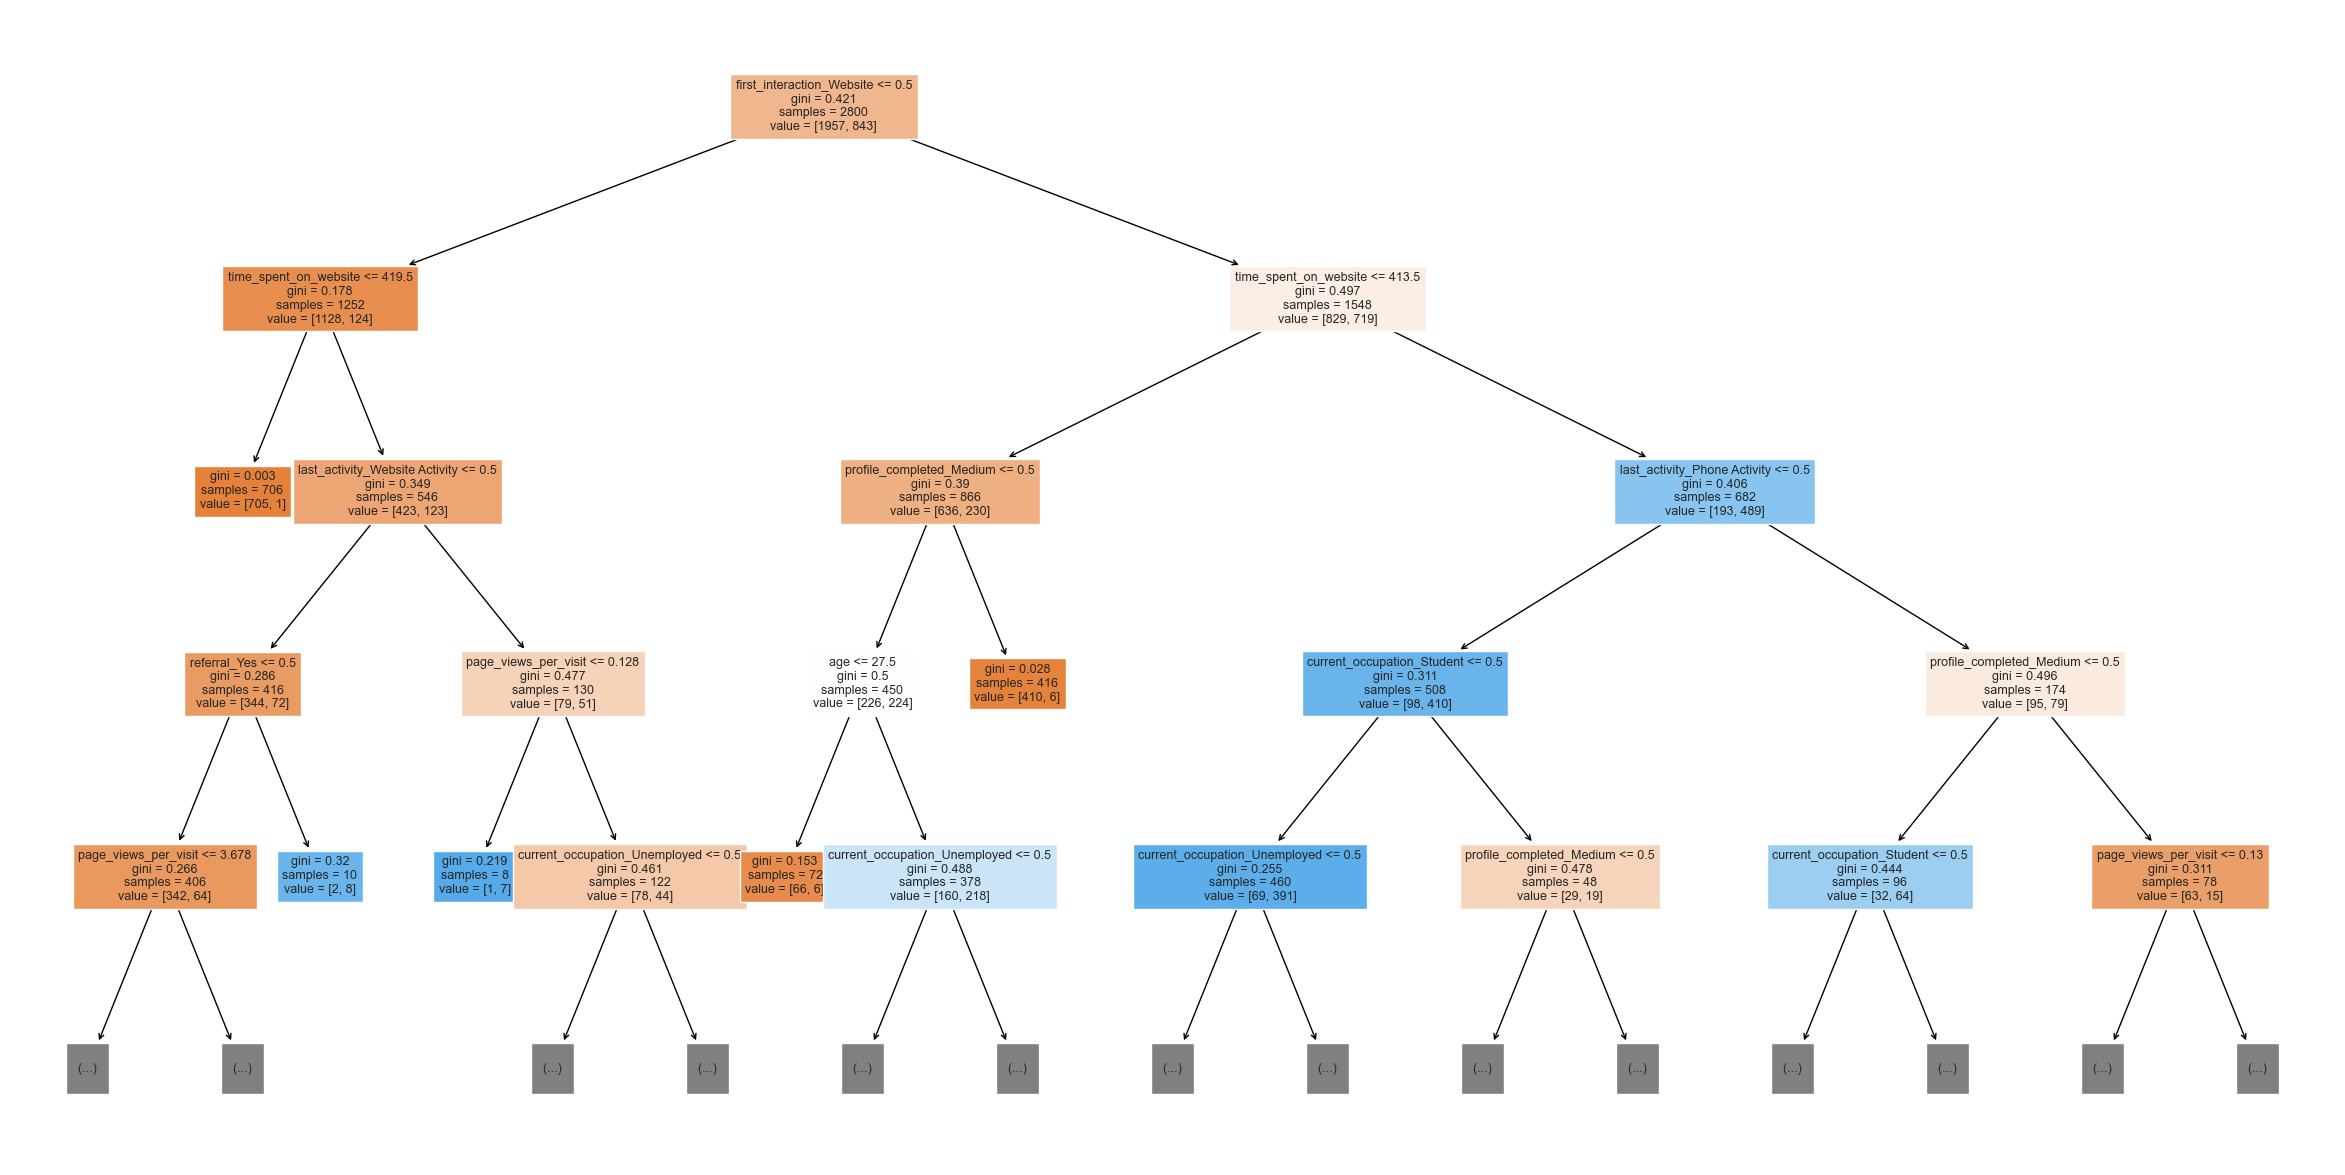

In [227]:
# Decision Tree Graph
feature_names = list(X_train.columns)
plt.figure(figsize=(30, 15))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Observation:
- After tuning the Data Model we can see that the train dataset has precision and recall value reduced to 0.91 and 0.95 for customers without conversion.
- After testing the test data set we can see that there is slight difference in precision and recall value with the train dataset.
- Thus we can say that the decision tree model is not overfit and we have reached the maximum accuracy.
- We can also see the decision tree graph above where the first_interaction_Website is the first branch node and we have set the max depth to 4.

## Building a Random Forest model

In [228]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1957
           1       1.00      1.00      1.00       843

    accuracy                           1.00      2800
   macro avg       1.00      1.00      1.00      2800
weighted avg       1.00      1.00      1.00      2800



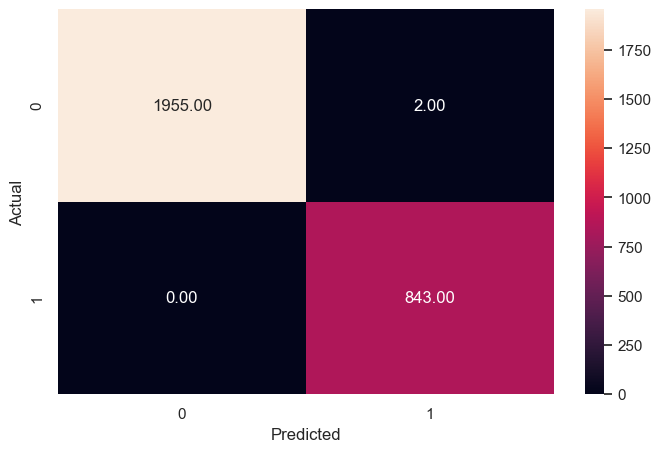

In [229]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       839
           1       0.81      0.71      0.76       362

    accuracy                           0.86      1201
   macro avg       0.84      0.82      0.83      1201
weighted avg       0.86      0.86      0.86      1201



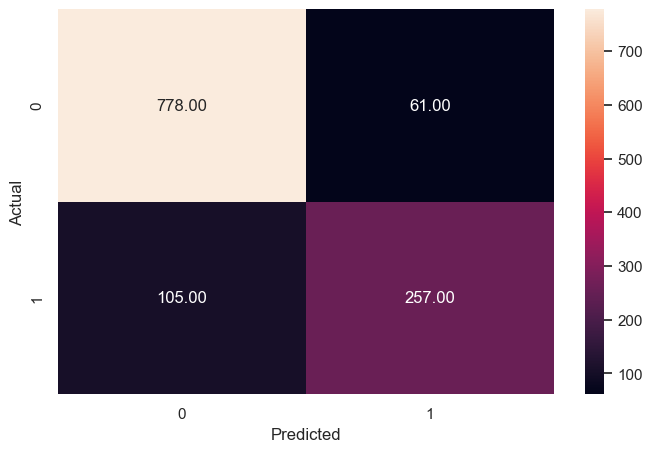

In [230]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

Observations:
- From the above Random Forest we can see that the data model is overfitted as the train data has 1.00 precision and recall value, and 
- After testing the test data on the trained data model we see more difference with the accuracy of the model. Thus we can say our model is over fitted and does not provide us with the accurate results.
- We need to tune the data model to reduce the over fitting.
- But our random forest model is better than the decision tree model.

## Do we need to prune the tree?

In [246]:
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 400],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1957
           1       0.86      0.99      0.92       843

    accuracy                           0.95      2800
   macro avg       0.93      0.96      0.94      2800
weighted avg       0.95      0.95      0.95      2800



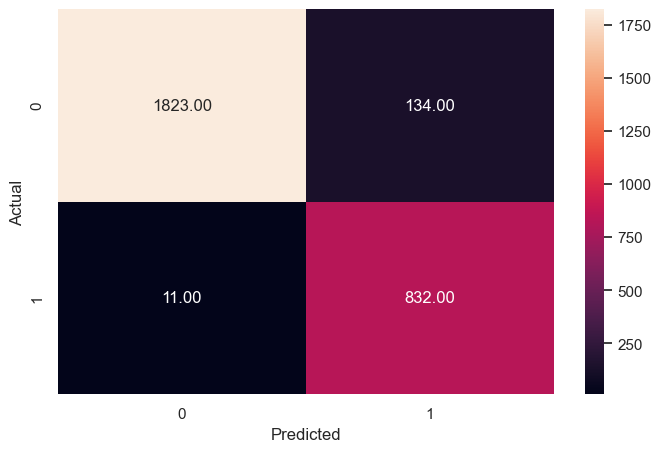

In [247]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       839
           1       0.75      0.78      0.76       362

    accuracy                           0.85      1201
   macro avg       0.83      0.83      0.83      1201
weighted avg       0.86      0.85      0.86      1201



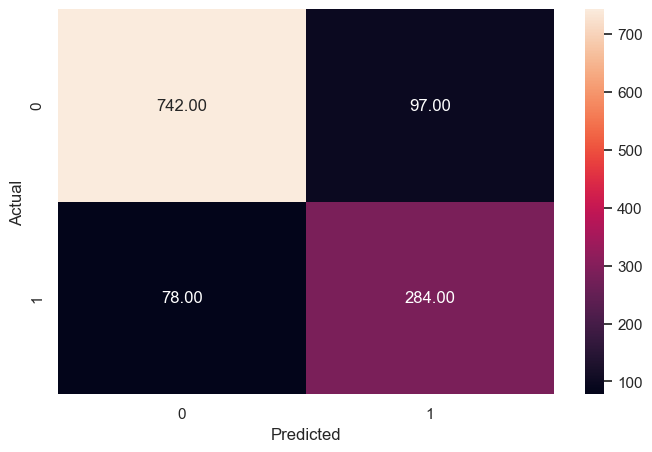

In [248]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

Observation:
- After tuning the Data Model we can see that the train dataset has precision and recall value reduced to 0.99 and 0.86 for customers without conversion.
- After testing the test data set we can see that there is slight difference in precision and recall value before and after tuning, but the model seems  to be still over fitted as there is more difference in the precision and recall value between the train and test data.

Text(0.5, 1.0, 'Feature importance Graph')

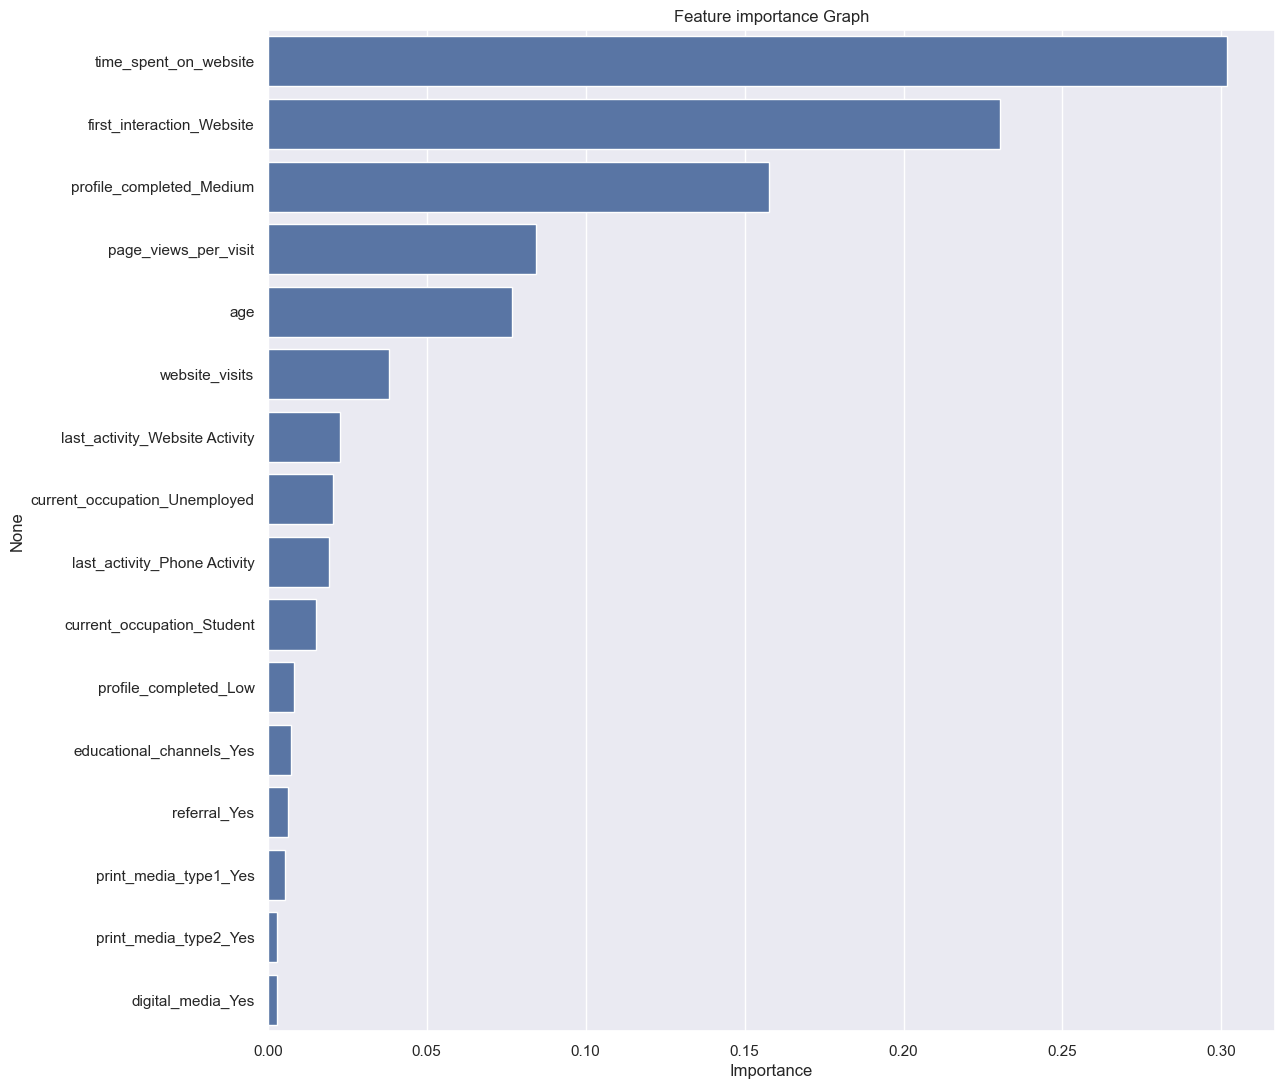

In [265]:
#Feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.title("Feature importance Graph")

Observations:
- From the above graph we can see the feature importance of the data metrics.
- Time_spent_on_website has more importance and digital_media_yes has less importance in the model

## Actionable Insights and Recommendations

Actionable Insights :
- The users who have completed their profile creation have more chances of conversion status.
- The Degital_media_yes  and print_media_type2_Yes data is not of much importance so we can eliminate them in model creation.
- We can provide additional recommendations to the users based on the time spent on website.
- The employment status also impact the conversion status, So we can focus on that area.
- Also we can infer that people between the age 35 to 55 and who are working profession have better conversion rate.

Recommendations :
- We might target the users who are visiting the websites and the users having more pages visits.
- We can also send recommendations to the Professional customers and educational as they have more chances of conversion.
- Also we can encorage the users to complete their profile who have medium completion status in creating their profile .
- We need to improve in the advertisment area as we do not see as much of an increace in the status conversion.
- We can target on people who are senior professionals or people who aged between 35 and 50.
